In [236]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import eig
import math
import random
import seaborn as sns

df = pd.read_csv("all-hands.dat")

(1a)

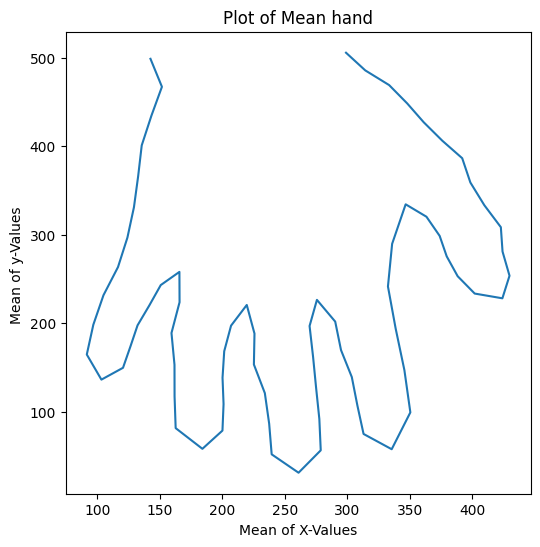

In [2]:
df_means = df.mean()

def plot_hand(meanss):
    X = []
    Y= []
    for index, value  in enumerate(meanss):
        if (index %2 ==0):  
            X.append(value)
        elif (index %2 ==1):
            Y.append(value)
    plt.figure(figsize=(6,6))
    plt.plot(X,Y)
    plt.xlabel("Mean of X-Values")
    plt.ylabel("Mean of y-Values ")
    plt.title("Plot of Mean hand")
    plt.show()


plot_hand(df_means)
    

(1b) Calculating the Covariance Matrix

In [3]:
x_norm = df-df_means
n, d = df.shape
print(n,d)

def calculate_cov_matrix(n,xnorm):
    return ((np.transpose(xnorm)@ xnorm))/(n-1)
    


cov_matrix = calculate_cov_matrix(n,x_norm)


#adds up diagnols of a square matrix
total_variance= np.trace(cov_matrix)
print("Total_Variance:", total_variance)
#Total Variance = 49826.32352941176



#Testing using NP functino
# print(np.cov(df,rowvar = False))


17 144
Total_Variance: 49826.32352941176


(1c) 

In [4]:
# print(df)
x1_values = df.iloc[:,0] #1st column 
x2_values = df.iloc[:,2] #3rd column
x1_mean = x1_values.mean()
x2_mean= x2_values.mean()
x1_norm = x1_values-x1_mean
x2_norm = x2_values-x2_mean

def calc_cov(n,x1norm,x2norm):
    return (np.sum(x1norm@x2norm))/(n-1)



print("The Cov between X1 & X2 is:", calc_cov(n,x1_norm,x2_norm))

#cross validation using npfucniot top upper right and bottom left represent cov(a,b)
print("NP COV function:\n" , np.cov(x1_values,x2_values))


def calc_corr():
    return calc_cov(n,x1_norm,x2_norm)/(x1_values.std()*x2_values.std())

print("The correlation Between X1 & X2 is:" , calc_corr())



The Cov between X1 & X2 is: 564.7205882352941
NP COV function:
 [[582.80882353 564.72058824]
 [564.72058824 552.01470588]]
The correlation Between X1 & X2 is: 0.995623728078799


The correlation of .99 indicated that X1 and X2 have a strong positive correlation meaning that these poitns dispaly a strong linear relationship. Because the points are adjacent to each other, they have very similar have very similar behaviors which backups the extremely high correlation value because these poitns are nearly the same 

(1d) Calculating the PCA

In [5]:
#I realized a lot of this is unnescensarcy since np sorts eigenvalues in descignin order but included it just incases they were not
def calculate_PCA(cov_matrix, n):

    evalues, evectors = np.linalg.eig(cov_matrix)
    index = np.argsort(evalues)[::-1]

    evalues = evalues[index]
    evectors = evectors[:, index]

    evalues = evalues[:n]
    evectors = evectors[:,:n]

    return evalues, evectors

# Assuming cov_matrix is already defined and x_norm is your normalized data matrix

e_values, p_components = calculate_PCA(cov_matrix, 144)
# print(p_components)

(1e) Scree Plot of Eigenvalues

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


([<matplotlib.axis.XTick at 0x15e781f70>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

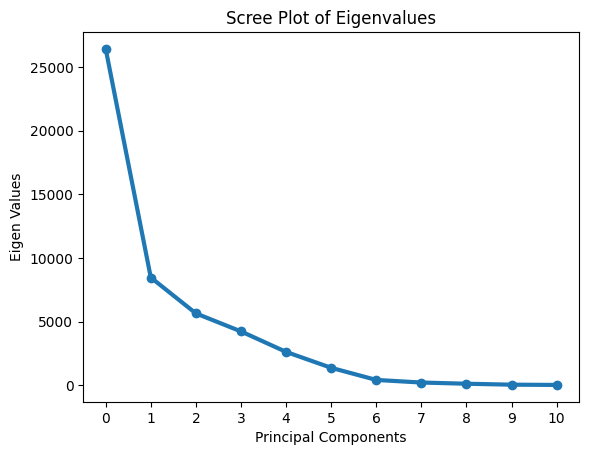

In [6]:
scree_evalues,moreevectors = calculate_PCA(cov_matrix,11)

plt.plot(scree_evalues,'o-',linewidth = 3)
plt.xlabel("Principal Components")
plt.ylabel("Eigen Values")
plt.title("Scree Plot of Eigenvalues")
plt.xticks(range(len(scree_evalues)))

Looking at the scree plot it seems that around 7 of the principal components are non-zero this tells us that that we need a minimum of 7 principal components to hold the integrity of the data and the number of princiapl components you need to show the menaingful variance in the data.

(1f)

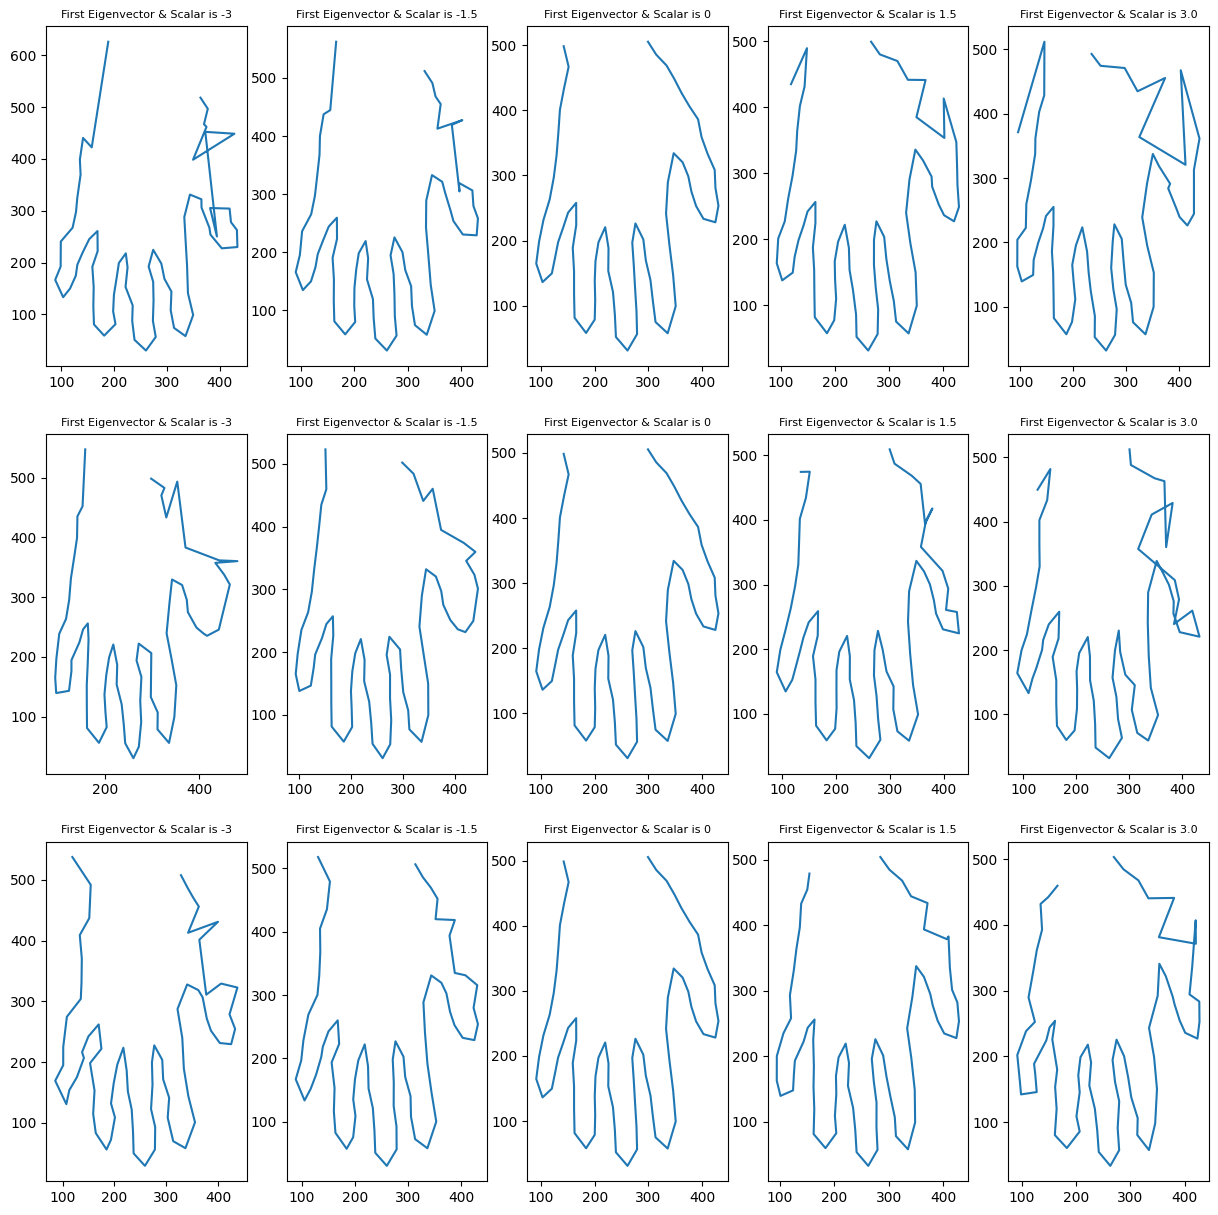

In [7]:
first_evalue = e_values[0]
first_evector = p_components[0]
second_evalue = e_values[1]
second_evector = p_components[1]
third_evalue = e_values[2]
third_evector = p_components[2]


#sqrt(first eigenvalue)

# Assuming the following variables are defined correctly:
# e_values, p_components, df_means

s_factors = [-3, -1.5, 0, 1.5, 3.0]

fig, axes = plt.subplots(3, 5, figsize=(15, 15))

for col, s in enumerate(s_factors):
    X1, Y1 = [], []
    X2, Y2 = [], []
    X3, Y3 = [], []

    hand1 = df_means + s * np.sqrt(first_evalue) * first_evector
    hand2 = df_means + s * np.sqrt(second_evalue) * second_evector
    hand3 = df_means + s * np.sqrt(third_evalue) * third_evector
    for index, value in enumerate(hand1):
        if index % 2 == 0:
            X1.append(value)
        else:
            Y1.append(value)
    axes[0, col].plot(X1, Y1)
    axes[0, col].set_title(f"First Eigenvector & Scalar is {s}")
    axes[0, col].title.set_size(8)

    for index, value in enumerate(hand2):
        if index % 2 == 0:
            X2.append(value)
        else:
            Y2.append(value)
    axes[1, col].plot(X2, Y2)
    axes[1, col].set_title(f"First Eigenvector & Scalar is {s}")
    axes[1, col].title.set_size(8)

    for index, value in enumerate(hand3):
        if index % 2 == 0:
            X3.append(value)
        else:
            Y3.append(value)
    axes[2, col].plot(X3, Y3)
    axes[2, col].set_title(f"First Eigenvector & Scalar is {s}")
    axes[2, col].title.set_size(8)

The dimension in the data represents corresponds to more variation in the data, as we can see from the graphs as the scalar multiples increase the data grew more and more dispere with wider fingers, and more erratic points, unable to caputre the full esscenve of a hand.

(1g)

([<matplotlib.axis.XTick at 0x15f5368a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

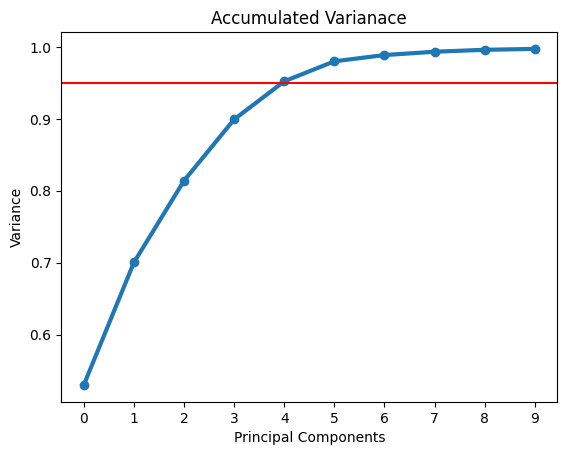

In [8]:
# p = variance of k principal components/ total variance

#where n is the number of principal components on the graph
def calc_cum_variance(n):
    X_PC = []
    np.array(e_values) #converts to np.array so that we can get first n elements
    total_variance = np.sum(e_values)#denominator
    for i in range(1,n+1):
        p = np.sum(e_values[:i])/total_variance
        X_PC.append(p)
    
    return(np.asarray(X_PC))

components = calc_cum_variance(10)

plt.plot(components,'o-',linewidth = 3)
plt.axhline(y=0.95,color = 'r')
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.title("Accumulated Varianace")
plt.xticks(range(len(components)))

You would need a minimum of 5 dimensions or princiapl components to represnet 95% of the variance in hand data as you can see by the graph above.

(1h)

The vector of weights is the projection of the first row multiplyed the the eigen vector or the principal components. The reconstrucuted plot doesnt really look that similar to the original hand but there might be some reseblace, for the princiapl componens were able to pick up some variation in the form of fingers

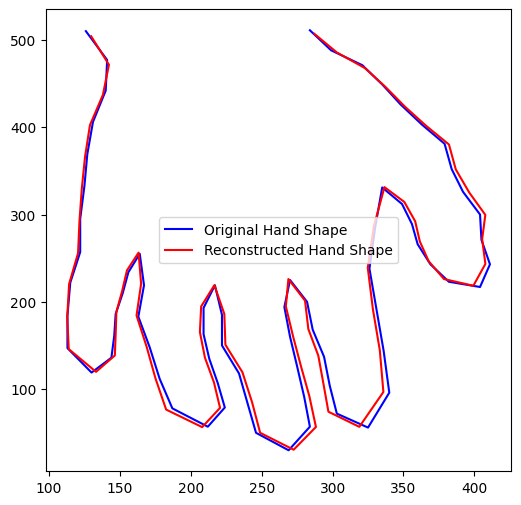

In [9]:
five_eigenvalues, five_eigenvectors = calculate_PCA(cov_matrix, 5)
five_eigenvectors 
first_row = df.iloc[0]
first_row_centered = first_row - df_means

first_row_centered
X1=[]
Y1= []
for index, value  in enumerate(first_row):
    if (index %2 ==0):  
        X1.append(value)
    elif (index %2 ==1):
        Y1.append(value)

weights = first_row_centered @ five_eigenvectors
reconstructed_hand = weights @ np.transpose(five_eigenvectors)+df_means

X2=[]
Y2=[]
for index, value  in enumerate(reconstructed_hand):
    if (index %2 ==0):  
        X2.append(value)
    elif (index %2 ==1):
        Y2.append(value)


plt.figure(figsize=(6,6))
plt.plot(X1, Y1, label='Original Hand Shape', color='blue')  # Original hand plot
plt.plot(X2, Y2,label='Reconstructed Hand Shape', color='red')  # Reconstructed hand plot
plt.legend()
plt.show()

(2a) I scaled the x values(the hippo vols) using theforula in the scale data funcition and the I created Xmatrix which i used np.hstack to add a column of 1s to represent the bias/interecept.

In [10]:
Oasis = pd.read_csv("OASIS-hippocampus.csv")
Oasis = Oasis[["RightHippoVol", "LeftHippoVol", "Dementia", "TrainData"]]# subsetted data

train_data = Oasis[Oasis["TrainData"] == 0]
test_data = Oasis[Oasis["TrainData"] == 1]

#scales the data betwee 0 and 1 using a min max approach
def scale_data(x):
    x_min = np.min(x)
    x_max = np.max(x)
    return (x-x_min)/(x_max-x_min)

train_rhv = np.asarray(scale_data(train_data["RightHippoVol"]))
train_lhv = np.asarray(scale_data(train_data["LeftHippoVol"]))

# right_scaled= scale_data(train_data["RightHippoVol"])
# left_scaled = scale_data(train_data["LeftHippoVol"])
scaled_df = pd.DataFrame({'right_scaled': train_rhv, 'left_scaled': train_lhv})

Xmatrix = np.hstack([np.ones((scaled_df.shape[0], 1)), scaled_df.to_numpy()])
print(Xmatrix)


[[1.         0.79064395 0.67472347]
 [1.         0.38694773 0.17124129]
 [1.         0.71787468 0.78656288]
 [1.         0.59630378 0.54690701]
 [1.         0.55703148 0.39287177]
 [1.         0.86745596 0.86972552]
 [1.         0.65492348 0.41253585]
 [1.         0.59630378 0.50553052]
 [1.         0.64192896 0.35190496]
 [1.         0.50996246 0.57599345]
 [1.         0.49812301 0.        ]
 [1.         0.66156512 0.56329373]
 [1.         0.56598325 0.38508808]
 [1.         0.71527577 0.51044654]
 [1.         0.56540572 0.15649324]
 [1.         0.63355472 0.47644408]
 [1.         0.74704014 0.40106514]
 [1.         0.56222928 0.10405571]
 [1.         0.55529887 0.42974191]
 [1.         0.82269708 0.7734535 ]
 [1.         0.34074502 0.19827939]
 [1.         0.93127346 0.80704629]
 [1.         0.88766965 0.93035641]
 [1.         0.91712388 1.        ]
 [1.         0.33265954 0.18885703]
 [1.         0.70516893 0.55059402]
 [1.         0.65434594 0.57804179]
 [1.         0.82529599 0.85

In [193]:
######This is my main implementatino of the Logistic Regressino Function --> niterations approach  #######
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def negllh(X, y, beta):
    predictions = sigmoid(np.dot(X, beta))
    return -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


def gradient_descent(X, y, beta, lr, niterations):
    neg_log_llh = []

    for _ in range(niterations):
        predictions = sigmoid(np.dot(X, beta))
        gradient = np.dot(np.transpose(X), (predictions - y)) / len(y)
        beta -= lr * gradient
        neg_log_llh.append(negllh(X, y, beta))

    return beta, neg_log_llh, gradient

def logistic_regression_descent(X, y, lr, n):
    beta = np.random.rand(X.shape[1])  
    return gradient_descent(X, y, beta, lr, n)

beta, llhs, gradient = logistic_regression_descent(Xmatrix,train_data["Dementia"],0.08,1750)
print(beta)
print(gradient)

[ 1.71894478 -1.73454047 -2.16187163]
[-0.00751029  0.00807456  0.00502326]


In [12]:
# ######    This runs until convergence but was taking too long to run   #######

# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def negllh(X, y, beta):
#     a = sigmoid(np.dot(X, beta))
#     b = -y * np.log(a) - (1 - y) * np.log(1 - a)
#     return np.sum(b) / len(y)

# def gradient_descent(X, y, beta, lr):
#     neg_log_llh = []

#     while(True):
#         betaprev = np.copy(beta)
#         predictions = sigmoid(np.dot(X, beta))
#         gradient = np.dot(np.transpose(X), (predictions - y)) / len(y)
#         beta -= lr * gradient
#         neg_log_llh.append(negllh(X, y, beta))

#         if(np.array_equal(betaprev,beta)):
#             print("Beta values have converged")
#             break

#     return beta, neg_log_llh, gradient

# def logistic_regression(X, y, lr):
#     beta = np.zeros(X.shape[1])  
#     return gradient_descent(X, y, beta, lr)

# beta, llhs, gradient = logistic_regression(Xmatrix,train_data["Dementia"])
# print(beta)
# print(gradient)

(2b) I started with a value of 0.01 the graph decreased but never really seemed to flatten,so increase it and a learningrate/stepsize of 0.08 was the learning rate that I decided on because it the values dont decrease too quickly but eventually flatten too.

(2c)

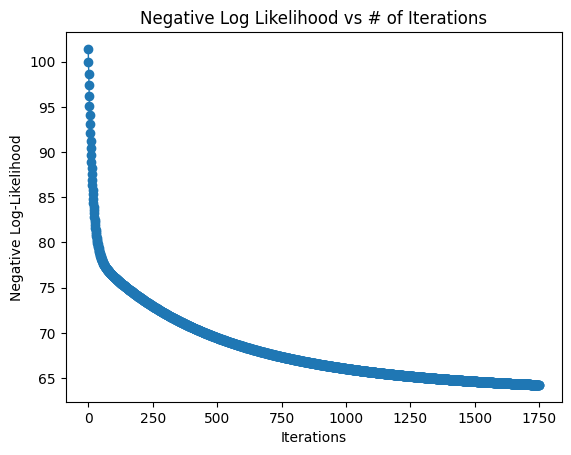

In [194]:
plt.plot(llhs, 'o-', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Negative Log-Likelihood")
plt.title("Negative Log Likelihood vs # of Iterations")
plt.show()

(2d)

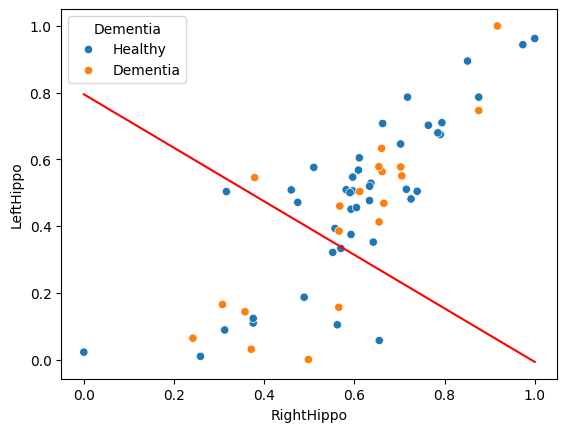

In [195]:
plot_df = pd.DataFrame({
    "RightHippo": scaled_df["right_scaled"],
    "LeftHippo": scaled_df["left_scaled"],
    "Dementia": train_data["Dementia"]
})

scatter = sns.scatterplot(data = plot_df, x = "RightHippo", y= "LeftHippo", hue = "Dementia") #2d Scatterplot

# Get the current legend
legend = scatter.get_legend()

# Specify custom labels
custom_labels = ["Healthy", "Dementia"]

# Set custom labels
for text, label in zip(legend.texts, custom_labels):
    text.set_text(label)

def linear_predictor(beta_vals, matrix):
    return sigmoid(np.dot(beta_vals,np.transpose(matrix)))

x_values = np.array([np.min(scaled_df),np.max(scaled_df)])
y_values = -(beta[0] + beta[1]*x_values) / beta[2]

plt.plot(x_values,y_values, color = 'red')

(2e)

In [198]:
right_test = test_data["RightHippoVol"]
left_test = test_data["LeftHippoVol"]

test_features = np.asarray(test_data[["RightHippoVol","LeftHippoVol"]])
scaled_testfeatures = scale_data(test_features)

#sigmoid functinobut more precisise becuz i wanted to tsee the exponent
exponent = -beta[0]-beta[1]*scaled_testfeatures[:,0]-beta[2]*scaled_testfeatures[:,1]

probabilities = sigmoid(exponent)

def classifier(probs):
    results = np.zeros_like(probs)  # Initialize the results array with zeros
    for index, element in enumerate(probs):
        if element <= 0.5:
            results[index] = 1
    return results

classifications = classifier(probabilities)

def calc_accuracy(pred, actual):
    accurate = 0 
    for index,element in enumerate(pred):
        if(element == actual[index]):
            accurate +=1
            
    return accurate/ len(actual)

real_classifications = np.asarray(test_data["Dementia"])
accuracy = calc_accuracy(classifications, real_classifications)
print("Accuracy:", accuracy*100,"%")#75% accurate



Accuracy: 78.57142857142857 %


I recieved an accuracy of ~78.00% for my model which is honestly very similar to my accuracy for naive Bayes, I think from my naive Bayes modeled I recieved an accuracy of 77.68% so in the same ballpark.

(3)

In [44]:
train_x = np.asarray(pd.read_csv("Data-ps2/mnist/trainX.txt",header = None, sep=','))
train_y  = np.asarray(pd.read_csv("Data-ps2/mnist/trainY.txt",header=None, sep=','))
test_x = np.asarray(pd.read_csv("Data-ps2/mnist/testX.txt",header = None, sep=','))
test_y = np.asarray(pd.read_csv("Data-ps2/mnist/testY.txt",header = None, sep=','))


print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)

def scale_pixel(x):
    #for pixel infomations
    min =0 
    max =255
    return (x-min)/(max-min)


#scaling train data and adding labels column to the front
scaled_train = scale_pixel(train_x)#scaling data
train_wlabels = pd.DataFrame(np.hstack((train_y, scaled_train))) #adding labels
only_35_labels_train = train_wlabels.loc[(train_wlabels[0]==3) | (train_wlabels[0]==5)]#filtering labels
train_labels_only = only_35_labels_train.loc[:, 0]# getting labels only column
train_labels_only = np.where(train_labels_only==3,0,1)# scaling 0s 
dropped_labels_train = only_35_labels_train.drop(only_35_labels_train.columns[0],axis = 1)#dropping labels column
train_xmatrix  = np.hstack([np.ones((dropped_labels_train.shape[0], 1)), dropped_labels_train.to_numpy()]) #addings 1s for intercept


Shape of train_x: (471, 784)
Shape of train_y: (471, 1)


I initialize my Beta values to 0 in one of the functions in my logistic regression methods because the Beta values are going to change and converge anyway.

(3b)Minizmiaizing negative log likelihood is equivalent to maximizing log likelihood

In [206]:
######This is my main implementatino of the Logistic Regressino Fucntion #######
import numpy as np
def gradient_ascent(X, y, beta, lr, niterations):
    log_llh = []

    for _ in range(niterations):
        predictions = sigmoid(np.dot(X, beta))
        gradient = np.dot(np.transpose(X), (y-predictions)) / len(y)
        beta += lr * gradient #only change from gradient descent trying to maximum
        log_llh.append(llh(X, y, beta))

    return beta, log_llh, gradient

def llh(X, y, beta):
    return -negllh(X,y,beta)

def logistic_regression_ascent(X, y, lr, n):
    beta = np.random.rand(X.shape[1])  

    return gradient_ascent(X, y, beta, lr, n)

beta3, llhs3, gradient3 = logistic_regression_ascent(np.asarray(train_xmatrix),np.asarray(train_labels_only),.01,1000)
print(beta3)

[-2.06081268e-01  4.40555685e-02  5.84314246e-01  7.42081999e-01
  9.32833990e-01  7.96291679e-01  5.72853416e-02  2.97157948e-01
  4.07020088e-01  7.04138755e-01  5.03917086e-01  6.33404015e-01
  4.21681304e-01  9.51905278e-01  5.13935314e-01  9.13087043e-02
  7.30291212e-01  6.40128940e-01  6.07862506e-01  1.05926121e-01
  7.23881178e-01  8.93698209e-01  3.00865412e-01  2.12951464e-01
  1.29268946e-01  7.90016432e-01  2.97139962e-01  9.16838403e-01
  1.07905254e-01  9.85809856e-01  7.03256165e-01  7.95005886e-01
  6.35777649e-01  8.29929145e-01  9.84713066e-01  2.94393278e-02
  4.85573375e-01  2.93034340e-02  7.15743099e-01  5.99132796e-01
  3.96276987e-01  3.91019949e-01  9.08323635e-02  2.46771292e-01
  2.55561012e-01  7.51844046e-01  4.36805194e-01  4.05905929e-01
  7.26045482e-01  3.02951136e-01  5.03708927e-01  5.04657220e-01
  3.43010189e-01  8.04754706e-01  9.14943119e-01  1.32177476e-01
  8.58260033e-01  8.05201208e-01  8.53957713e-01  7.34872826e-01
  3.58826638e-01  8.49823

(3c) 

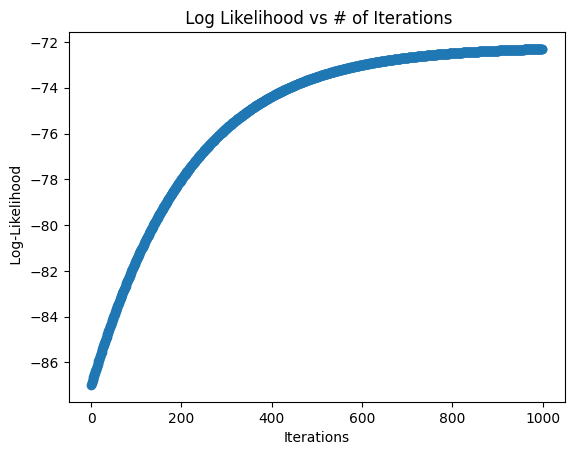

In [207]:
plt.plot(llhs3, 'o-', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel(" Log-Likelihood")
plt.title(" Log Likelihood vs # of Iterations")
plt.show()

(3d) Prediciting Test Data

In [227]:
#scaling test data and adding labels colum to the front
scaled_test = scale_pixel(test_x) #scaling data
test_wlabels = pd.DataFrame(np.hstack((test_y,scaled_test))) #adding lbels
only_35_labels_test = test_wlabels.loc[(test_wlabels[0]==3) | (test_wlabels[0]==5)]
test_labels_only = only_35_labels_test.loc[:, 0]# labels only column 
test_labels_only = np.where(test_labels_only ==3,0,1)
dropped_labels_test = only_35_labels_test.drop(only_35_labels_test.columns[0],axis = 1)
test_xmatrix  = np.hstack([np.ones((dropped_labels_test.shape[0], 1)),dropped_labels_test.to_numpy()]) 

MNISTpreds = []
MNISTclasses = []
for row in test_xmatrix:
    MNISTpreds.append(sigmoid(np.dot(row,beta3)))

for idx, element in enumerate(MNISTpreds):
    if(element<.5):
        MNISTclasses.append(1)
    else:
        MNISTclasses.append(0)

test_labels = np.asarray(test_labels_only)

stat_df = pd.DataFrame({
    "Labels": test_labels,
    "Probabilities": MNISTpreds,
    "Classifications":MNISTclasses,
})

accuracy = calc_accuracy(MNISTclasses,test_labels_only)
print("Accuracy:", accuracy*100,"%") # sadly I could only get about 64% accuracy from this run even after tweaking the 
#hyperparamteres
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(stat_df.sort_values(by = ['Probabilities'],ascending = True))  

Accuracy: 65.97938144329896 %
    Labels  Probabilities  Classifications
60       1       0.472179                1
23       0       0.477897                1
3        0       0.478022                1
57       1       0.478264                1
48       1       0.478623                1
56       1       0.479414                1
63       1       0.479854                1
42       1       0.480396                1
36       0       0.480538                1
46       1       0.480687                1
88       1       0.480857                1
45       1       0.480944                1
33       0       0.481762                1
16       0       0.481905                1
44       1       0.482387                1
54       1       0.483370                1
86       1       0.484507                1
84       1       0.484810                1
8        0       0.485203                1
68       1       0.485573                1
62       1       0.485640                1
72       1       0.48681

(1e) I definetly think the mistakes were more reasonable as some of them were harder to classify, but because I didnt have the highest accuracy some were also more classifiable than the more difficult ones.

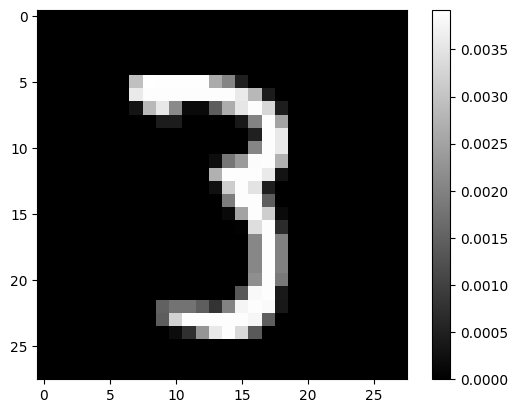

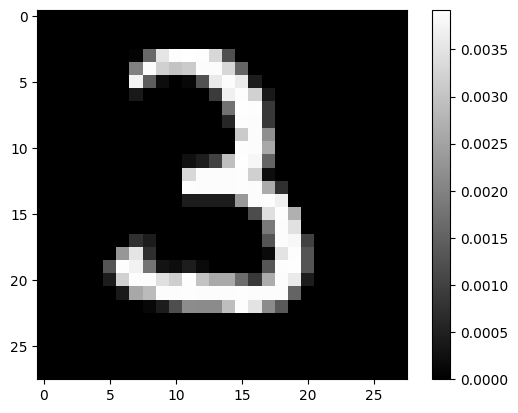

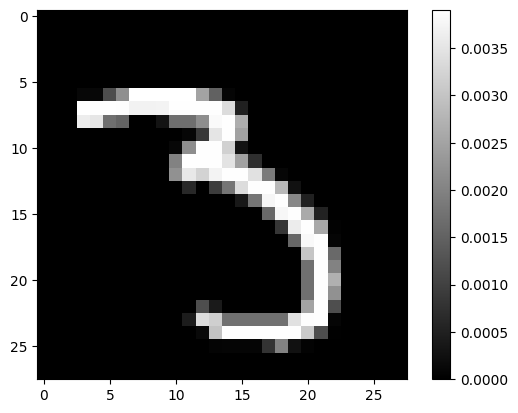

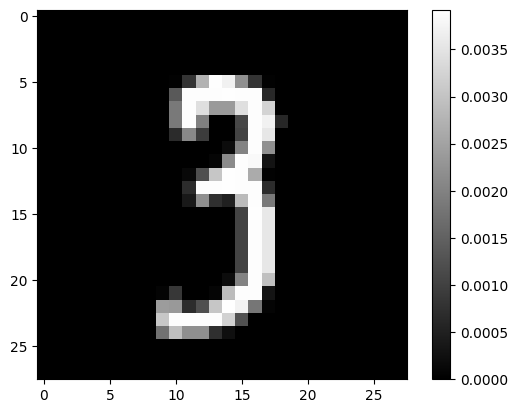

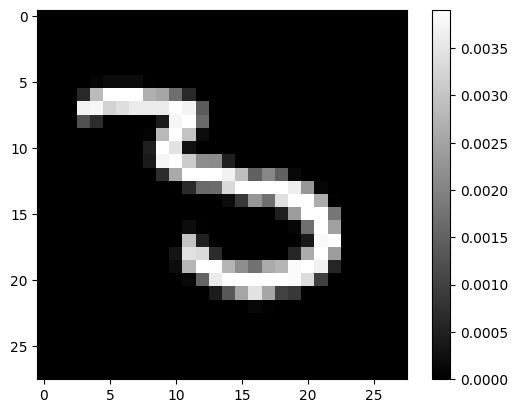

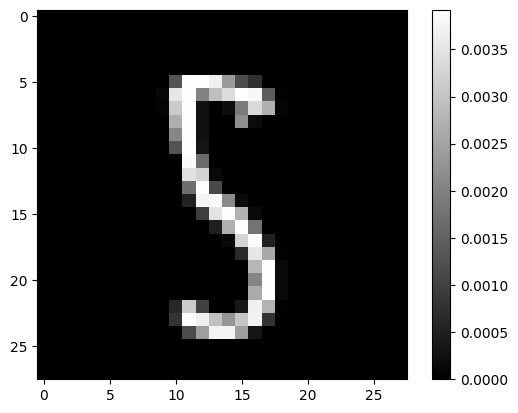

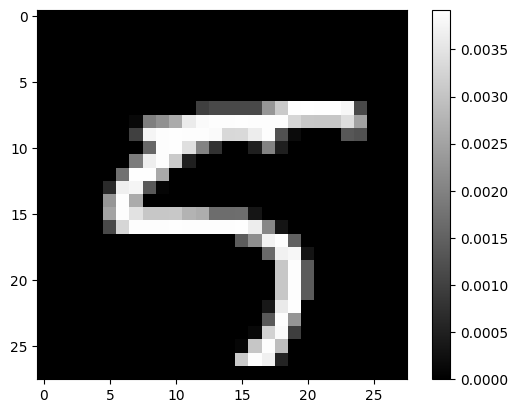

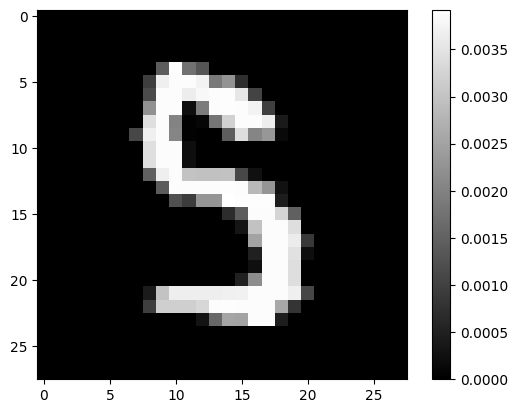

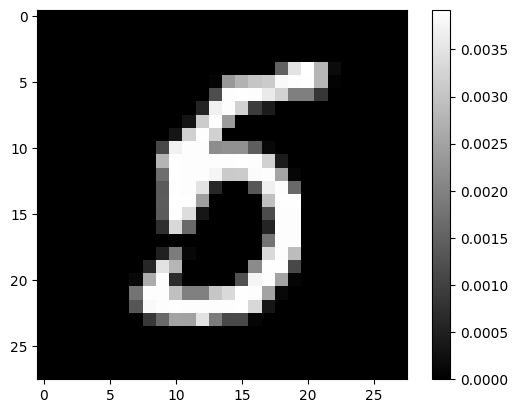

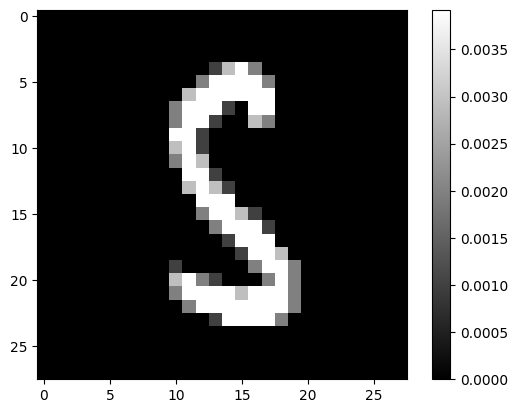

In [253]:
classified_correctly3 =[]
classified_correctly5 =[]
classified_incorrectly3= []
classified_incorrectly5 = []


for idx,element in stat_df.iterrows():
    if element["Labels"] ==0:
        if element["Labels"] ==element["Classifications"]:
            classified_correctly3.append(idx)
        else :
            classified_incorrectly3.append(idx)
    elif element ["Labels"] ==1:
        if element["Labels"] ==element["Classifications"]:
            classified_correctly5.append(idx)
        else:
            classified_incorrectly5.append(idx)
        
def plot_img(idx):
    df = np.asarray(dropped_labels_test)
    image = df[idx]
    image_reshaped = np.reshape(image, (28, 28))
    plt.imshow(image_reshaped, cmap='gray')
    plt.colorbar()  # Optionally, add a colorbar to see the pixel values
    plt.show()

randomscorrect3 = random.sample(classified_correctly3,5)
randomscorrect5 = random.sample(classified_correctly5,5)
randomsincorrect3 = random.sample(classified_incorrectly3,5)
randomsincorrect5 = random.sample(classified_incorrectly5,10)

#plotting
# for val in randomscorrect3:
#     plot_img(val)
# for val in randomscorrect5:
#     plot_img(val)
for val in randomsincorrect3:
    plot_img(val)
for val in randomscorrect5:
    plot_img(val)

